# Описание проекта

The customer is the credit department of the bank. It is necessary to understand whether the marital status and the number of children of the client affect the fact of repayment of the loan on time. Input data from the bank — statistics on the solvency of customers.
The results of the study will be taken into account when building a credit scoring model — a special system that evaluates the ability of a potential borrower to repay a loan to a bank.

## Description of the data
- children — the number of children in the family
- days_employed — total work experience in days
- dob_years — client's age in years
- education — client's education level
- education_id — education level identifier
- family_status — marital status
- family_status_id — id of marital status
- gender — gender of the client
- income_type — type of employment
- debt — whether there was a debt on repayment of loans
- total_income — monthly income
- purpose — the purpose of obtaining a loan

### Information about the dataset

In [53]:
import pandas as pd
data = pd.read_csv('credit_scoring.csv')

In [54]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Data pre-processing

#### Filling missing values_1

In [56]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

The amount of income is most affected by the type of employment, so you need to fill in the gaps in this column with the median value for each type from the income_type column. For example, for a person with the employee employment type, the pass in the total_income column should be filled with the median income among all records with the same type.

In [57]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

#### Processing of abnormal values

In [58]:
data['days_employed'] = data['days_employed'].abs()

In [59]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (unemployed and pensioners) will have abnormally large values. It is difficult to correct such values, so leave them as they are. Moreover, this column will not be needed for this project.

In [60]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [61]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [62]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

#### Filling missing values_2

In [63]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [64]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

#### Changing data types

In [65]:
data['total_income'] = data['total_income'].astype(int)

#### Processing duplicates

In [66]:
data.duplicated().sum()

54

In [67]:
data = data.drop_duplicates()

In [68]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [69]:
data['education'] = data['education'].str.lower()

#### Categorization of data

Based on the ranges listed below, I will create a `total_income_category` column with categories in the `data` dataframe:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001-1000000 — `B";
- 1000001 and above — `A".

In [70]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [71]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [72]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Let's create a function that, based on the data from the purpose column, will form a new purpose_category column, which will include the following categories:

'car operations',
'real estate transactions',
'conducting a wedding',
'getting an education'.
For example, if the purpose column contains the substring 'to buy a car', then the string will appear in the purpose_category column 'car operations'

In [73]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'car '
        elif 'жил' in row or 'недвиж' in row:
            return 'real estate'
        elif 'свад' in row:
            return 'wedding'
        elif 'образов' in row:
            return 'education'
    except:
        return 'no category'

In [74]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

#### relationship between the number of children and the repayment of the loan on time

children
0    7.535266
1    9.232689
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64


<AxesSubplot:xlabel='children', ylabel='debt'>

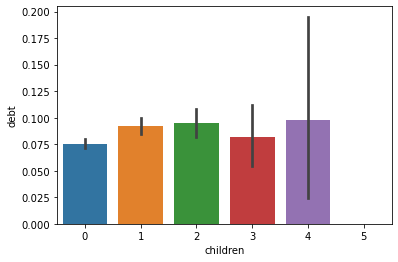

In [75]:
#calculate and display the percentage of repayment on the loan, depending on the number of children
print(data.groupby('children')['debt'].sum() / data.groupby('children')['debt'].count() *100) 



import seaborn as sns 

#in order for the comparison to be as clear as possible, we will show the difference on a bar chart
sns.barplot(data=data, x="children", y="debt")

**Conclusion_1** 
The hypothesis was partially confirmed: bank customers without children are more likely to repay the loan on time than customers with children. 
However, it is worth noting that the number of clients with 3 children or more does not represent a sufficiently relevant group for the study of this dependence

#### relationship between marital status and repayment of the loan on time

family_status
Не женат / не замужем    9.763948
в разводе                7.064760
вдовец / вдова           6.624606
гражданский брак         9.286059
женат / замужем          7.557476
Name: debt, dtype: float64


[Text(0, 0, 'женат / замужем'),
 Text(1, 0, 'гражданский брак'),
 Text(2, 0, 'вдовец / вдова'),
 Text(3, 0, 'в разводе'),
 Text(4, 0, 'Не женат / не замужем')]

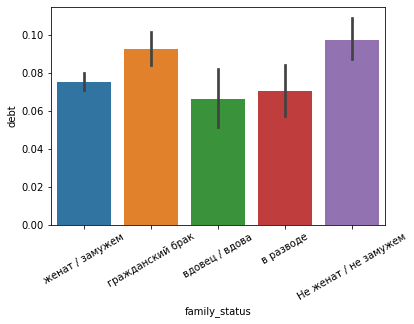

In [76]:
#calculate and display the percentage of repayment on the loan, depending on marital status
print(data.groupby('family_status')['debt'].sum() / data.groupby('family_status')['debt'].count() *100) 


ax_1=sns.barplot(data=data, x="family_status", y="debt")
ax_1.set_xticklabels(ax_1.get_xticklabels(),rotation = 30)

**Conclusion_2:** It is possible to give credit to clients who are in a civil marriage or unmarried / unmarried, but with great risk;
while widows and widowers repay the debt on time much more often

#### relationship between the income level and the repayment of the loan on time

total_income_category
A    8.000000
B    7.060231
C    8.489145
D    6.017192
E    9.090909
Name: debt, dtype: float64


<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

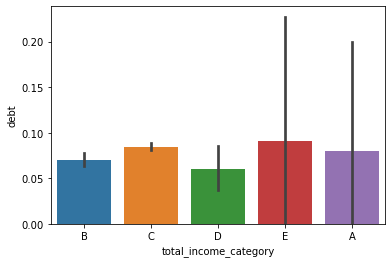

In [77]:
print(data.groupby('total_income_category')['debt'].sum() / data.groupby('total_income_category')['debt'].count() *100) 

sns.barplot(data=data, x="total_income_category", y="debt") 

**Conclusion_3:** With relatively low earnings, the client often faces problems with repayment of the loan. However, a high income does not guarantee a 100% return on time. It is worth checking what the loan is being taken for and how quickly it is returned

####  How do different loan goals affect its repayment on time?

purpose_category
car            9.343611
education      9.250439
real estate    7.253115
wedding        7.874355
Name: debt, dtype: float64
                      debt
purpose_category          
car               0.093436
education         0.092504
real estate       0.072531
wedding           0.078744


[Text(0, 0, 'real estate'),
 Text(1, 0, 'car '),
 Text(2, 0, 'education'),
 Text(3, 0, 'wedding')]

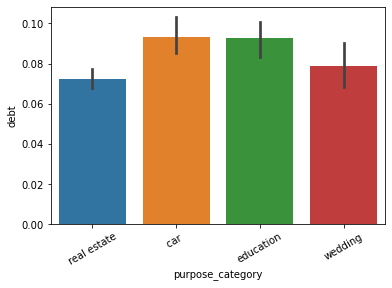

In [78]:

print(data.groupby('purpose_category')['debt'].sum() / data.groupby('purpose_category')['debt'].count() *100) 

data_pivot = data.pivot_table(index='purpose_category', values='debt', aggfunc='mean')
print(data_pivot)

ax = sns.barplot(data=data, x="purpose_category", y="debt") 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

**Conclusion_4:** It seems that it is more profitable for the bank to give a loan for the purchase of real estate and for a wedding. By the way, after the wedding, the client changes family_status, the percentage of the refund in the new status increases.

#### Missing values

the same number of passes in two columns is striking: experience and income. This may be due to the lack of data about these customers (lack of credit history, failure to provide data), as well as a possible technical error.

### **Final conclusion**

<div class="alert alert-info">
<b> 
    For the scoring model, it is worth considering and assigning different coefficients depending on:
1) the number of children: childless clients are more likely to return money on time, clients with 1-2 children have a little more difficulties;
2) marital status:widowers and divorced clients are more likely to repay the loan on time than single people and clients in a civil marriage
3) income: with an income less than 30,000, it is more difficult to repay the loan
4) loan objectives:a loan for a wedding and for the purchase of real estate will return with a higher probability than for a car or education.</b>
<br>
</div>